# 1. Libraries import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import dataset

In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')
df.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [3]:
df.shape

(500, 9)

# 3. Visualize Dataset

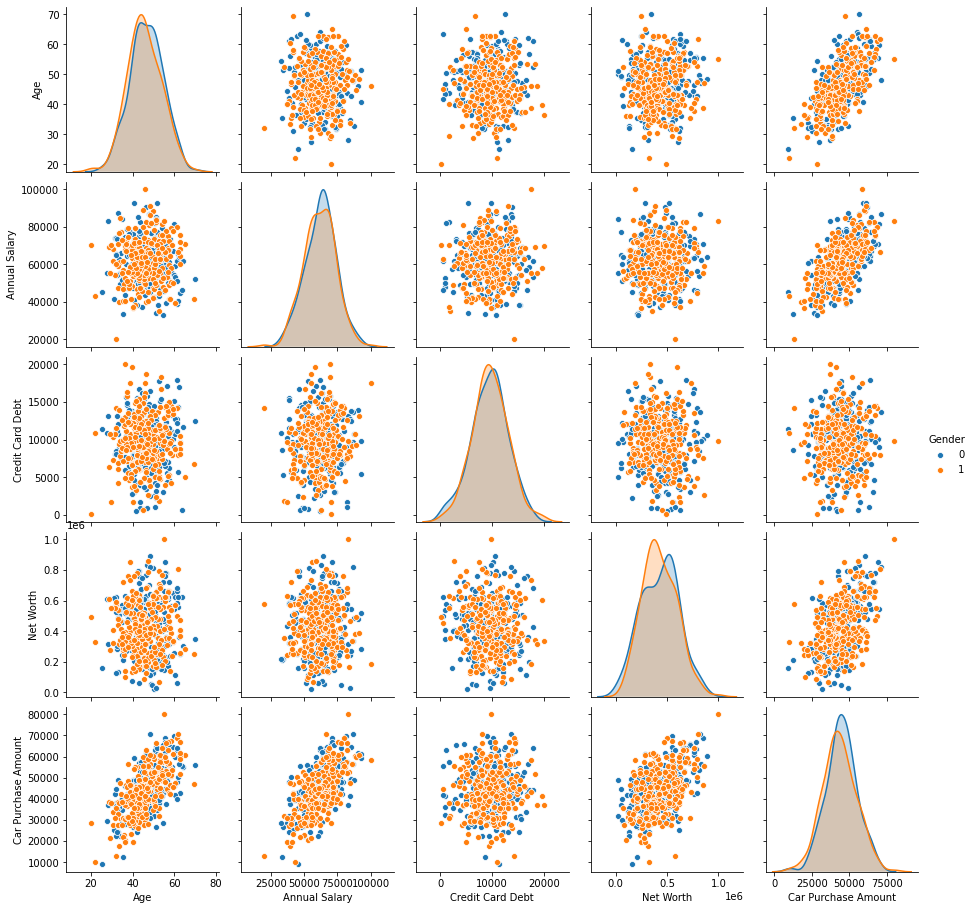

In [4]:
sns.pairplot(df, hue='Gender');

# 4. Create testing and training dataset /data cleaing

In [5]:
X = df.iloc[:,3:-1]
X.shape

(500, 5)

In [6]:
y = df['Car Purchase Amount']

In [7]:
y.shape

(500,)

#### MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0,1))
X_scale = scale.fit_transform(X)
print(X_scale)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [9]:
scale.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [10]:
# REshaping y
y = y.values.reshape(-1,1)
y.shape

(500, 1)

In [11]:
y_scale = scale.fit_transform(y)
y_scale

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# 5. Training the model

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.33, random_state=42)

In [13]:
X_train

array([[0.        , 0.47085056, 0.56705079, 0.3889153 , 0.57106204],
       [0.        , 0.16019351, 0.78553167, 0.65337478, 0.30181155],
       [1.        , 0.60386032, 0.39690293, 0.54701993, 0.62174735],
       ...,
       [0.        , 0.50611883, 0.54451307, 0.18241808, 0.60002003],
       [1.        , 0.75948586, 0.26761617, 0.40760507, 0.40950916],
       [1.        , 0.20984707, 0.60361478, 0.36471292, 0.39230338]])

In [14]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(100,  activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [17]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 25, verbose = 1, validation_split = 0.2)

Epoch 1/100
11/11 [==============================] - 1s 52ms/step - loss: 0.1290 - val_loss: 0.0350
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0381 - val_loss: 0.0182
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0137 - val_loss: 0.0100
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0100 - val_loss: 0.0075
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 8/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 8.3860e-04
Epo

11/11 [==============================] - 0s 6ms/step - loss: 3.2744e-06 - val_loss: 1.7191e-05
Epoch 78/100
11/11 [==============================] - 0s 7ms/step - loss: 3.1935e-06 - val_loss: 1.7166e-05
Epoch 79/100
11/11 [==============================] - 0s 6ms/step - loss: 3.1162e-06 - val_loss: 1.7622e-05
Epoch 80/100
11/11 [==============================] - 0s 7ms/step - loss: 4.4746e-06 - val_loss: 2.6005e-05
Epoch 81/100
11/11 [==============================] - 0s 6ms/step - loss: 4.6080e-06 - val_loss: 2.0653e-05
Epoch 82/100
11/11 [==============================] - 0s 7ms/step - loss: 3.8720e-06 - val_loss: 1.7280e-05
Epoch 83/100
11/11 [==============================] - 0s 7ms/step - loss: 3.3509e-06 - val_loss: 1.6534e-05
Epoch 84/100
11/11 [==============================] - 0s 6ms/step - loss: 3.2730e-06 - val_loss: 1.6040e-05
Epoch 85/100
11/11 [==============================] - 0s 7ms/step - loss: 4.3742e-06 - val_loss: 1.6883e-05
Epoch 86/100
11/11 [=====================

In [18]:
4.9247e-06, 3.1843e-06, 6.9919e-06

(4.9247e-06, 3.1843e-06, 6.9919e-06)

# 6. Evaluation the model

In [19]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

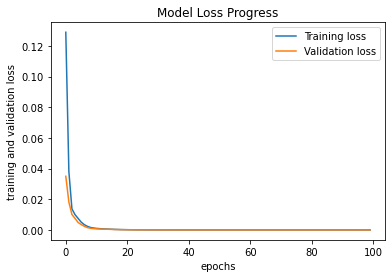

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('training and validation loss')
plt.xlabel('epochs')
plt.legend(['Training loss', 'Validation loss'])

In [21]:
y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5)
# X_test = scale.inverse_transform(X_test)
# X_train = scale.inverse_transform(X_train)
# y_test = scale.inverse_transform(y_test)
# y_train = scale.inverse_transform(y_train)
y_pred = scale.inverse_transform(y_pred)

# PREDICTION

In [22]:
# Gender	Age 	Annual Salary	Credit Card Debt	Net Worth
# ENTER HERE
X_test_sample_1 = np.array([[0, 43,  53515, 5783, 22342]])

y_predict_sample = model.predict(X_test_sample_1)

print('Expected CAR Purchase Amount = ',  int(y_predict_sample))

Expected CAR Purchase Amount =  36934
